In [10]:
pwd

'/Users/mean/Downloads'

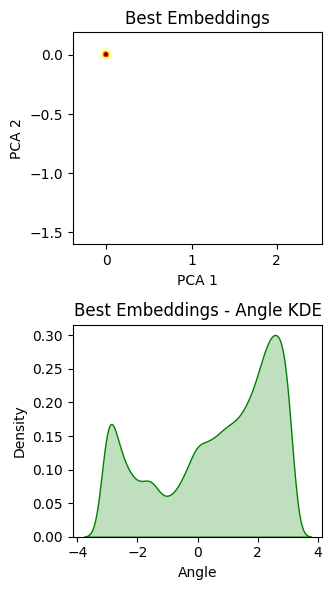

In [11]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Load embeddings
best_user_emb = torch.load('./best_user_emb.pt', map_location=torch.device('cpu'))
best_item_emb = torch.load('./best_item_emb.pt', map_location=torch.device('cpu'))

# Concatenate user and item embeddings
best_embeddings = torch.cat([best_user_emb, best_item_emb], dim=0)

# Apply PCA
import torch

def pca_2d(embeddings):
    mean_vector = torch.mean(embeddings, dim=0)
    centered_matrix = embeddings - mean_vector
    cov_matrix = torch.mm(centered_matrix.T, centered_matrix) / (centered_matrix.shape[0]-1)
    
    # Eigen decomposition using the updated function
    eigen_values_complex, eigen_vectors_complex = torch.linalg.eig(cov_matrix)
    
    # Extracting real parts of eigenvalues and eigenvectors since PCA deals with real-valued data
    eigen_values = eigen_values_complex.real
    eigen_vectors = eigen_vectors_complex.real
    
    # Sorting the eigenvalues and selecting the top 2
    sorted_indices = torch.argsort(eigen_values, descending=True)
    top_2_indices = sorted_indices[:2]
    top_2_eigen_vector = eigen_vectors[:, top_2_indices]
    
    # Transforming the centered data matrix
    transformed = torch.mm(centered_matrix, top_2_eigen_vector)
    
    return transformed

best_2d = pca_2d(best_embeddings)

# KDE Visualization
def plot_kde_2d(embeddings_2d, ax, title):
    sns.kdeplot(x=embeddings_2d[:, 0].detach().numpy(), y=embeddings_2d[:, 1].detach().numpy(), cmap="hot_r", ax=ax, fill=True)
    ax.set_title(title)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

def plot_kde_angle(embeddings_2d, ax, title):
    angles = torch.atan2(embeddings_2d[:, 1], embeddings_2d[:, 0]).detach().numpy()
    sns.kdeplot(angles, fill=True, ax=ax, color='g')
    ax.set_title(title + ' - Angle KDE')
    ax.set_xlabel('Angle')
    ax.set_ylabel('Density')

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(3.5, 6))

plot_kde_2d(best_2d, axes[0], 'Best Embeddings')
plot_kde_angle(best_2d, axes[1], 'Best Embeddings')

plt.tight_layout()
plt.savefig('/Users/mean/Downloads/test.png')
plt.show()
